In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

plt.style.use('fivethirtyeight')
# warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
train = pd.read_csv('./titanic/train.csv')

In [4]:
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

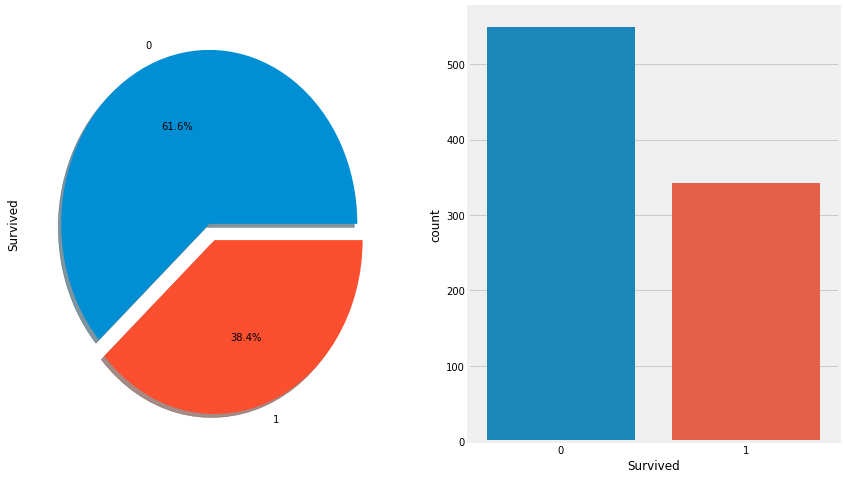

In [7]:
f,ax = plt.subplots(1,2,figsize=(13,8))
train.groupby('Survived')['Survived'].count().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0,0.1],shadow=True)
sns.countplot('Survived',data = train,ax=ax[1])
plt.show()

In [8]:
train.groupby(['Sex','Survived'])['Survived','Age'].count().to_excel('./groupby.xlsx')

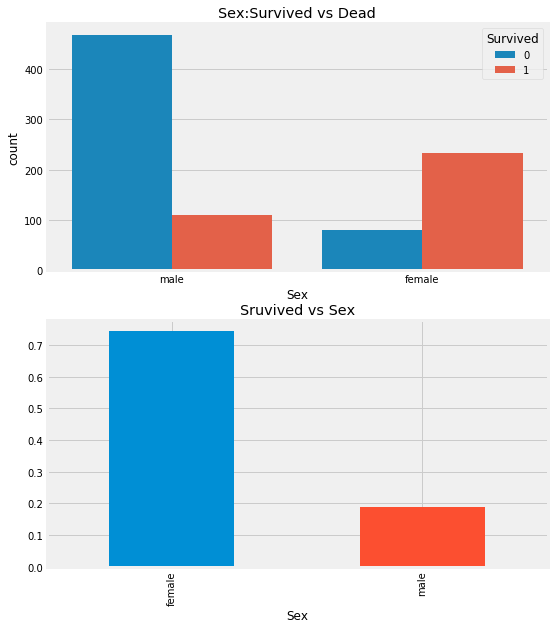

In [9]:
f,ax = plt.subplots(2,1,figsize=(8,10))
train.groupby(['Sex'])['Survived'].mean().plot.bar(ax=ax[1])
ax[1].set_title('Sruvived vs Sex')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[0])
ax[0].set_title('Sex:Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([train.Sex,train.Pclass],train.Survived).style.background_gradient(cmap='summer_r')

In [ ]:
pd.DataFrame(np.random.randint(1,100,[20,35])).style.background_gradient(cmap='summer')

d:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


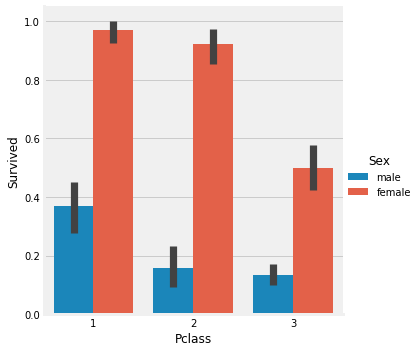

In [23]:
sns.catplot(data=train,x='Pclass',y='Survived',hue='Sex',kind='bar')